In [1]:
import joblib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import pandas as pd
import os
import numpy as np

In [2]:
import tensorflow as tf
from keras.backend import set_session

In [3]:
# classes = {'0': 'letter', '1': 'form', '2': 'email', '3': 'handwritten', '4': 'advertisement', '5': 'scientific report', '6': 'scientific publication', '7': 'specification', '8': 'file folder', '9': 'news article', '10': 'budget', '11': 'invoice', '12': 'presentation', '13': 'questionnaire', '14': 'resume', '15': 'memo'}
root_path = '/kaggle/output'
def make_doc_dirs(path): 
    if not os.path.exists(path):
        os.mkdir(path)
    for label in range(16): 
        if not os.path.exists(path + string.ascii_lowercase[label]):
            os.mkdir(path + string.ascii_lowercase[label])
# if not os.path.exists('/kaggle/working/training/'):
#     os.mkdir('/kaggle/working/training/')
make_doc_dirs('/kaggle/working/training/')
make_doc_dirs('/kaggle/working/testing/')
make_doc_dirs('/kaggle/working/validation/')

In [4]:
import seaborn as sns
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1000, 
                        inter_op_parallelism_threads=1000, 
                        allow_soft_placement=True)
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

Device mapping: no known devices.


In [6]:
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
all_images_path=pd.read_csv("../input/datathonindoml-2022/train_labels.csv")
# all_images_path.head()
X_train, X_val, y_train, y_val = train_test_split( all_images_path["id"], all_images_path["label"], test_size=0.4, random_state=40,shuffle=True,stratify=all_images_path["label"])
X_val, X_test, y_val, y_test = train_test_split( X_val, y_val, test_size=0.5, random_state=40,shuffle=True,stratify=y_val)

In [8]:
import shutil

# src_path = r"E:\demos\files\report\profit.txt"
# dst_path = r"/kaggle/working/training/\profit.txt"
for path, label in zip(X_train,y_train):
    shutil.copy(r"../input/datathonindoml-2022/train/train/"+str(path)+".tif", r"./training/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")
for path, label in zip(X_test,y_test):
    shutil.copy(r"../input/datathonindoml-2022/train/train/"+str(path)+".tif", r"./testing/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")
for path, label in zip(X_val,y_val):
    shutil.copy(r"../input/datathonindoml-2022/train/train/"+str(path)+".tif", r"./validation/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")

In [9]:
train=[]
for path,label in zip(X_train,y_train):
    train.append("./training/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")
test=[]
for path,label in zip(X_test,y_test):
    test.append("./testing/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")
cv=[]
for path,label in zip(X_val,y_val):
    cv.append("./validation/"+string.ascii_lowercase[label]+"/"+str(path)+".tif")

In [12]:
from keras.preprocessing.image import ImageDataGenerator


In [13]:
y_cv=y_val.copy()

In [14]:
train_datagen = ImageDataGenerator(rotation_range=45,brightness_range=[0.5,1.5],zoom_range=0.5,
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [15]:
train_it = train_datagen.flow_from_directory('./training/',batch_size=32,target_size=(256, 256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('./testing/',batch_size=32,target_size=(256, 256))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('./validation/', batch_size=32,target_size=(256, 256))

Found 9600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [16]:
from tensorflow.keras.optimizers import Adam, SGD

In [17]:
# import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 256,256
batch_size = 16
epochs = 50


# model =keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [23]:
model = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = 'imagenet',include_top = False,input_shape = (img_width, img_height, 3))

219070464/219055592 [==============================] - 7s 0us/step


In [18]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_1.hdf5', save_best_only=True, monitor='acc', mode='max')

In [19]:
from keras.layers import GlobalAveragePooling2D

In [34]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

def plot_loss(history):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

    # list of epoch numbers
    x = list(range(1,20+1))


    vy = history.history['val_loss']
    ty = history.history['loss']
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
def plot_acc(history):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('model accuracy')

    # list of epoch numbers
    x = list(range(1,20+1))

    vy = history.history['val_accuracy']
    ty = history.history['accuracy']
    ax.plot(x, vy, 'b', label="Validation accuracy")
    ax.plot(x, ty, 'r', label="Train accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [24]:
model_res = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = 'imagenet',include_top = False,input_shape = (img_width, img_height, 3))

ValueError: You are trying to load a weight file containing 451 layers into a model with 448 layers.

In [17]:
for layer in model_res.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_res.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_res = Model(inputs = model_res.input, outputs = predictions)

# compile the model 
model_final_res.compile(loss = "categorical_crossentropy", optimizer =Adam(learning_rate=0.0001), metrics=["accuracy"])


In [32]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_res_1.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [36]:
history = model_final_res.fit(
train_it,
steps_per_epoch =11200/64,
epochs=20,    
validation_data=cv_it,
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save])

Epoch 1/20
175/175 [==============================] - 147s 746ms/step - loss: 2.2285 - accuracy: 0.3084 - val_loss: 1.7261 - val_accuracy: 0.4606
Epoch 2/20
175/175 [==============================] - 126s 719ms/step - loss: 1.6399 - accuracy: 0.5064 - val_loss: 1.6677 - val_accuracy: 0.4775
Epoch 3/20
175/175 [==============================] - 126s 718ms/step - loss: 1.4346 - accuracy: 0.5763 - val_loss: 1.2675 - val_accuracy: 0.6269
Epoch 4/20
175/175 [==============================] - 125s 716ms/step - loss: 1.2802 - accuracy: 0.6179 - val_loss: 1.1794 - val_accuracy: 0.6538
Epoch 5/20
175/175 [==============================] - 126s 717ms/step - loss: 1.1439 - accuracy: 0.6602 - val_loss: 2.0932 - val_accuracy: 0.3700
Epoch 6/20
175/175 [==============================] - 125s 716ms/step - loss: 1.0961 - accuracy: 0.6755 - val_loss: 1.1616 - val_accuracy: 0.6631
Epoch 7/20
175/175 [==============================] - 124s 709ms/step - loss: 1.0206 - accuracy: 0.6957 - val_loss: 1.0325 -

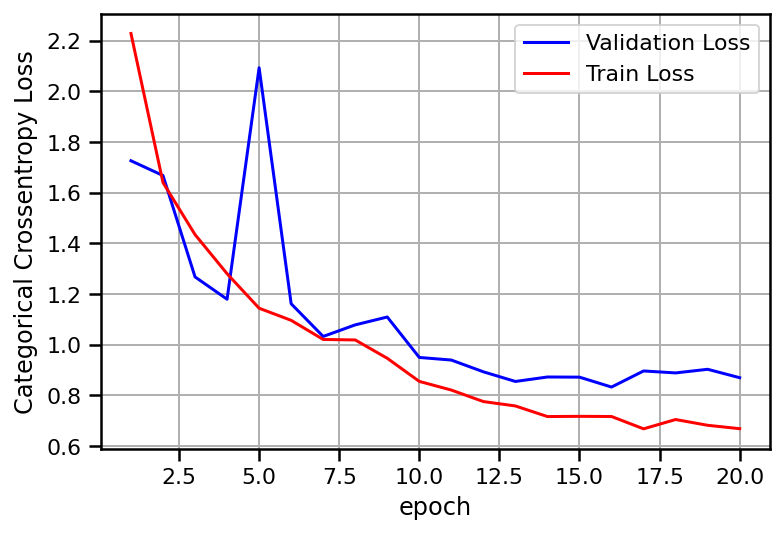

In [38]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,20+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [39]:
score=model_final_res.evaluate_generator(test_it,steps=1600/64,workers=2, use_multiprocessing=True, verbose=0)

In [40]:
print("The accuracy for model-Pretrained vgg-16 fine-tuning the last CNN inception layer:",score[1]*100,"%")

The accuracy for model-Pretrained vgg-16 fine-tuning the last CNN inception layer: 76.2499988079071 %


In [18]:
# model_2 =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3),)
model_2 = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = None,include_top = False,input_shape = (256, 256, 3))

In [19]:
mcp_save = ModelCheckpoint('model_2.hdf5', save_best_only=True, monitor='acc', mode='max')

In [20]:
for layer in model_2.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_2.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_2 = Model(model_2.input,predictions)

# compile the model 
model_final_2.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_2.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [22]:
model_final_2.load_weights('../input/weights/model_res_1 (1).hdf5')

In [23]:
def height_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:256,:,:]
        yield (batch_Xcrops,label)

In [24]:
train_datagen = ImageDataGenerator(rotation_range=45,brightness_range=[0.5,1.5],zoom_range=0.3,
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [25]:
train_it_2 = train_datagen.flow_from_directory('./training/',batch_size=32,target_size=(512,256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('./testing/',batch_size=32,target_size=(512,256))
# load and iterate test dataset
cv_it_2 = cv_datagen.flow_from_directory('./validation/', batch_size=32,target_size=(512,256))

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [26]:
history=model_final_2.fit_generator(
height_crop_generator(train_it_2),
steps_per_epoch =11200/64,
epochs=5,    
validation_data=height_crop_generator(cv_it_2),
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save]
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-05 18:21:47.889058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-10-05 18:22:05.778880: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


175/175 [==============================] - 238s 1s/step - loss: 1.2753 - accuracy: 0.6239 - val_loss: 1.1965 - val_accuracy: 0.6375
Epoch 2/5
175/175 [==============================] - 212s 1s/step - loss: 1.2297 - accuracy: 0.6323 - val_loss: 1.1914 - val_accuracy: 0.6481
Epoch 3/5
128/175 [====================>.........] - ETA: 54s - loss: 1.0853 - accuracy: 0.6748

KeyboardInterrupt: 

In [ ]:
model_final_bottom.load_weights('model_2.hdf5')

In [72]:
score=model_final_2.evaluate_generator(height_crop_generator(test_it),steps=1600/64,workers=2, use_multiprocessing=True, verbose=0)

In [73]:
print("The accuracy for model intradomain transfer learning for top region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for top region: 74.00000095367432 %


In [65]:
# model_2 =keras.applications.vgg16.VGG16(weights = None, include_top=False, input_shape = (256,256, 3),)
model_bottom = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = None,include_top = False,input_shape = (256, 256, 3))

In [66]:
for layer in model_bottom.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_bottom.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_bottom = Model(model_bottom.input, predictions)

# compile the model 
model_final_bottom.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [76]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_bottom.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [77]:
model_final_bottom.load_weights('model_res_1.hdf5')

In [71]:
def bottom_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][-256:,:,:]
        yield (batch_Xcrops,label)

In [79]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [80]:
train_it = train_datagen.flow_from_directory('./training/',batch_size=32,target_size=(512,256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('./testing/',batch_size=32,target_size=(512,256))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('./validation/', batch_size=32,target_size=(512,256))

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [81]:
history=model_final_bottom.fit_generator(
bottom_crop_generator(train_it),
steps_per_epoch =11200/64,
epochs=5,    
validation_data=bottom_crop_generator(cv_it),
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/5
175/175 [==============================] - 106s 508ms/step - loss: 1.2856 - accuracy: 0.6129 - val_loss: 1.1986 - val_accuracy: 0.6500
Epoch 2/5
175/175 [==============================] - 85s 485ms/step - loss: 1.1693 - accuracy: 0.6529 - val_loss: 1.0679 - val_accuracy: 0.6844
Epoch 3/5
175/175 [==============================] - 85s 487ms/step - loss: 0.8448 - accuracy: 0.7500 - val_loss: 1.1481 - val_accuracy: 0.6631
Epoch 4/5
175/175 [==============================] - 84s 477ms/step - loss: 0.8830 - accuracy: 0.7370 - val_loss: 1.0618 - val_accuracy: 0.6900
Epoch 5/5
175/175 [==============================] - 85s 486ms/step - loss: 0.6322 - accuracy: 0.8123 - val_loss: 1.1632 - val_accuracy: 0.6862


In [82]:
model_final_bottom.load_weights('model_bottom.hdf5')

In [34]:
score=model_final_bottom.evaluate_generator(bottom_crop_generator(test_it),steps=1600/64,workers=2, use_multiprocessing=True, verbose=0)

NameError: name 'model_final_bottom' is not defined

In [ ]:
print("The accuracy for model intradomain transfer learning for bottom region:",score[1]*100,"%")

In [35]:
model_left = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = None,include_top = False,input_shape = (256, 256, 3))

In [38]:
for layer in model_left.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_left.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final_left = Model(model_left.input, predictions)

# compile the model 
model_final_left.compile(loss = "categorical_crossentropy", optimizer =Adam(learning_rate=0.0001), metrics=["accuracy"])

In [39]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_left.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [40]:
model_final_left.load_weights('model_res_1.hdf5')

In [72]:
def left_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,:256,:]
        yield (batch_Xcrops,label)

In [42]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [43]:
train_it = train_datagen.flow_from_directory('./training/',batch_size=32,target_size=(256,512))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('./testing/',batch_size=32,target_size=(256,512))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('./validation/', batch_size=32,target_size=(256,512))

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [44]:
history=model_final_left.fit_generator(
left_crop_generator(train_it),
steps_per_epoch =11200/64,
epochs=5,    
validation_data=left_crop_generator(cv_it),
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save]
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-05 13:24:24.449713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-10-05 13:24:41.886954: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


175/175 [==============================] - 110s 491ms/step - loss: 1.1006 - accuracy: 0.6804 - val_loss: 1.0895 - val_accuracy: 0.6931
Epoch 2/5
175/175 [==============================] - 83s 476ms/step - loss: 1.0152 - accuracy: 0.6968 - val_loss: 0.9909 - val_accuracy: 0.7188
Epoch 3/5
175/175 [==============================] - 82s 471ms/step - loss: 0.6832 - accuracy: 0.8009 - val_loss: 0.9700 - val_accuracy: 0.7225
Epoch 4/5
175/175 [==============================] - 83s 474ms/step - loss: 0.7029 - accuracy: 0.7952 - val_loss: 1.0437 - val_accuracy: 0.7088
Epoch 5/5
175/175 [==============================] - 82s 469ms/step - loss: 0.4794 - accuracy: 0.8607 - val_loss: 1.1633 - val_accuracy: 0.7044


In [45]:
score=model_final_left.evaluate_generator(left_crop_generator(test_it),steps=39997/128,workers=2, use_multiprocessing=True, verbose=0)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
Process Keras_worker_ForkPoolWorker-1:
Traceback (most recent call last):
Process Keras_worker_ForkPoolWorker-2:
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/opt/conda/lib/python3.7/multipr

In [46]:
print("The accuracy for model intradomain transfer learning for left region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for left region: 71.28594517707825 %


In [47]:
model_right = keras.applications.inception_resnet_v2.InceptionResNetV2(weights = None,include_top = False,input_shape = (256, 256, 3))

In [49]:
for layer in model_right.layers:
    layer.trainable=True

#Adding custom Layers 
x = model_right.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)


# creating the final model 
model_final_right = Model(model_right.input, predictions)

# compile the model 
model_final_right.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [50]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_right.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [51]:
model_final_right.load_weights('model_res_1.hdf5')

In [73]:
def right_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,-256:,:]
        yield (batch_Xcrops,label)

In [53]:
train_datagen = ImageDataGenerator(
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [55]:
train_it = train_datagen.flow_from_directory('./training/',batch_size=32,target_size=(256,512))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('./testing/',batch_size=32,target_size=(256,512))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('./validation/', batch_size=32,target_size=(256,512))

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [56]:
history=model_final_right.fit_generator(
right_crop_generator(train_it),
steps_per_epoch =11200/64,
epochs=5,    
validation_data=right_crop_generator(cv_it),
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save]
)

Epoch 1/5
175/175 [==============================] - 106s 499ms/step - loss: 1.1605 - accuracy: 0.6571 - val_loss: 1.2079 - val_accuracy: 0.6381
Epoch 2/5
175/175 [==============================] - 84s 478ms/step - loss: 1.0514 - accuracy: 0.6909 - val_loss: 1.0392 - val_accuracy: 0.6850
Epoch 3/5
175/175 [==============================] - 83s 472ms/step - loss: 0.7455 - accuracy: 0.7809 - val_loss: 1.1325 - val_accuracy: 0.6800
Epoch 4/5
175/175 [==============================] - 83s 474ms/step - loss: 0.7595 - accuracy: 0.7750 - val_loss: 1.1654 - val_accuracy: 0.6781
Epoch 5/5
175/175 [==============================] - 83s 474ms/step - loss: 0.4340 - accuracy: 0.8823 - val_loss: 1.0018 - val_accuracy: 0.7200


In [ ]:
score=model_final_right.evaluate_generator(right_crop_generator(test_it),steps=1600/64,workers=2, use_multiprocessing=True, verbose=0)

In [58]:
print("The accuracy for model intradomain transfer learning for right region:",score[1]*100,"%")

The accuracy for model intradomain transfer learning for right region: 73.77196550369263 %


In [227]:
model_final_2.load_weights('model_2.hdf5')
model_final_bottom.load_weights('model_bottom.hdf5')
model_final_left.load_weights('model_left.hdf5')
model_final_right.load_weights('model_right.hdf5')

In [228]:
train_it_tb = train_datagen.flow_from_directory('./training/',batch_size=1,target_size=(512,256),shuffle=False)
# load and iterate validation dataset
test_it_tb = test_datagen.flow_from_directory('./testing/',batch_size=1,target_size=(512,256),shuffle=False)
# load and iterate test dataset
cv_it_tb = cv_datagen.flow_from_directory('./validation/', batch_size=1,target_size=(512,256),shuffle=False)

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [229]:
feature_top = model_final_2.predict_generator(height_crop_generator(cv_it_tb),steps = 3200)
feature_bottom = model_final_bottom.predict_generator(bottom_crop_generator(cv_it_tb),steps = 3200)

In [230]:
train_it_lr = train_datagen.flow_from_directory('./training/',batch_size=1,target_size=(256,512),shuffle=False)
# load and iterate validation dataset
test_it_lr = test_datagen.flow_from_directory('./testing/',batch_size=1,target_size=(256,512),shuffle=False)
# load and iterate test dataset
cv_it_lr = cv_datagen.flow_from_directory('./validation/', batch_size=1,target_size=(256,512),shuffle=False)

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [231]:
feature_left = model_final_left.predict_generator(left_crop_generator(cv_it_lr),steps = 3200)
feature_right = model_final_right.predict_generator(right_crop_generator(cv_it_lr),steps = 3200)

In [232]:
import joblib

joblib.dump(feature_top,'top')
joblib.dump(feature_bottom,'bottom')
joblib.dump(feature_left,'left')
joblib.dump(feature_right,'right')

['right']

In [233]:
train_it_e = train_datagen.flow_from_directory('./training/',batch_size=1,target_size=(256,256),shuffle=False)
# load and iterate validation dataset
test_it_e = test_datagen.flow_from_directory('./testing/',batch_size=1,target_size=(256,256),shuffle=False)
# load and iterate test dataset
cv_it_e = cv_datagen.flow_from_directory('./validation/', batch_size=1,target_size=(256,256),shuffle=False)

Found 11200 images belonging to 16 classes.
Found 1600 images belonging to 16 classes.
Found 3200 images belonging to 16 classes.


In [234]:
model_final_res.load_weights('model_res_1.hdf5')

In [235]:
feature_holistic = model_final_res.predict_generator(cv_it_e,steps = 3200)

In [236]:
joblib.dump(feature_holistic,'holistic')

['holistic']

In [237]:
feature_holistic_t=model_final_res.predict_generator(test_it_e,steps = 1600)

In [238]:
feature_top_t = model_final_2.predict_generator(height_crop_generator(test_it_tb),steps = 1600)
feature_bottom_t= model_final_bottom.predict_generator(bottom_crop_generator(test_it_tb),steps = 1600)

In [239]:
feature_left_t = model_final_left.predict_generator(left_crop_generator(test_it_lr),steps = 1600)
feature_right_t = model_final_right.predict_generator(right_crop_generator(test_it_lr),steps = 1600)

In [240]:
joblib.dump(feature_top_t,'top_t')
joblib.dump(feature_bottom_t,'bottom_t')
joblib.dump(feature_left_t,'left_t')
joblib.dump(feature_right_t,'right_t')

['right_t']

In [241]:
joblib.dump(feature_holistic_t,'holistic_t')

['holistic_t']

In [246]:
feature_holistic_train=model_final_res.predict_generator(train_it_e,steps = 11200)

In [247]:
feature_top_train = model_final_2.predict_generator(height_crop_generator(train_it_tb),steps = 11200)
feature_bottom_train= model_final_bottom.predict_generator(bottom_crop_generator(train_it_tb),steps = 11200)

In [248]:
feature_left_train = model_final_left.predict_generator(left_crop_generator(train_it_lr),steps = 11200)

In [249]:
feature_right_train = model_final_right.predict_generator(right_crop_generator(train_it_lr),steps = 11200)

In [250]:
joblib.dump(feature_holistic_train,'holistic_train')
joblib.dump(feature_top_train,'top_train')
joblib.dump(feature_bottom_train,'bottom_train')
joblib.dump(feature_left_train,'left_train')
joblib.dump(feature_right_train,'right_train')

['right_train']

In [251]:
header=joblib.load('top')
footer=joblib.load('bottom')
left=joblib.load('left')
right=joblib.load('right')
holistic_features=joblib.load('holistic')

In [252]:
region_features=np.hstack((header,footer,left,right))

In [253]:
total_features=np.hstack((holistic_features,region_features))

In [254]:
total_features.shape

(3200, 80)

In [255]:
#Loading the true labels 
cv_labels=[]
for i in range(3200):
   batch=next(cv_it_tb)
   cv_labels.append(batch[1])

In [256]:
test_labels=[]
for i in range(1600):
   batch=next(test_it_tb)
   test_labels.append(batch[1])

In [257]:
train_labels=[]
for i in range(11200):
   batch=next(train_it_tb)
   train_labels.append(batch[1])

In [258]:
cv_labels=np.array(cv_labels)
cv_labels=cv_labels.reshape((3200, 16))

In [259]:
train_labels=np.array(train_labels)
train_labels=train_labels.reshape((11200, 16))

In [260]:
joblib.dump(test_labels,'test_labels')
joblib.dump(train_labels,'train_labels')
joblib.dump(cv_labels,'cv_labels')

['cv_labels']

In [261]:
#Loading the features from train data
header_test=joblib.load('top_t')
footer_test=joblib.load('bottom_t')
left_test=joblib.load('left_t')
right_test=joblib.load('right_t')
holistic_features_test=joblib.load('holistic_t')

In [262]:
total_features_test=np.hstack((header_test,footer_test,left_test,right_test,holistic_features_test))

In [263]:
total_features.shape

(3200, 80)

In [264]:
total_features_test.shape

(1600, 80)

In [265]:
#Loading the features from train data 
header_train=joblib.load('top_train')
footer_train=joblib.load('bottom_train')
left_train=joblib.load('left_train')
right_train=joblib.load('right_train')
holistic_features_train=joblib.load('holistic_train')

In [266]:
total_features_train=np.hstack((header_train,footer_train,left_train,right_train,holistic_features_train))

In [267]:
total_features_train.shape

(11200, 80)

In [269]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomNormal

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(total_features.shape[1],)))
model_relu.add(Dropout(0.70))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu'))
model_relu.add(Dropout(0.70))
model_relu.add(Dense(16, activation='softmax'))

In [270]:
model_relu.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history=model_relu.fit(total_features_train,train_labels,
batch_size=64,
epochs=40, verbose=1,    
validation_data=(total_features,cv_labels),
validation_steps=3200/64,
callbacks=[reduce_lr,mcp_save])

Epoch 1/40
175/175 [==============================] - 1s 3ms/step - loss: 2.6777 - accuracy: 0.2731 - val_loss: 1.9833 - val_accuracy: 0.8525
Epoch 2/40
175/175 [==============================] - 0s 3ms/step - loss: 1.0900 - accuracy: 0.6682 - val_loss: 0.9074 - val_accuracy: 0.8659
Epoch 3/40
175/175 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.8281 - val_loss: 0.5570 - val_accuracy: 0.8662
Epoch 4/40
175/175 [==============================] - 1s 3ms/step - loss: 0.4316 - accuracy: 0.8880 - val_loss: 0.5062 - val_accuracy: 0.8656
Epoch 5/40
175/175 [==============================] - 1s 3ms/step - loss: 0.3252 - accuracy: 0.9180 - val_loss: 0.5035 - val_accuracy: 0.8650
Epoch 6/40
175/175 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.9310 - val_loss: 0.5124 - val_accuracy: 0.8616
Epoch 7/40
175/175 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.9427 - val_loss: 0.5242 - val_accuracy: 0.8616
Epoch 

In [ ]:
score=model_relu.evaluate(total_features_test,test_labels,batch_size=32)

In [ ]:
print("Accuracy on the test data:",score[1]*100,'%')

In [271]:
test_it_tb = test_datagen.flow_from_directory("../input/datathonindoml-2022/validation",batch_size=1,target_size=(512,256),shuffle=False)
test_it_lr = test_datagen.flow_from_directory("../input/datathonindoml-2022/validation",batch_size=1,target_size=(256,512),shuffle=False)
test_it_e = test_datagen.flow_from_directory("../input/datathonindoml-2022/validation",batch_size=1,target_size=(256,256),shuffle=False)

holistic_features_test=model_final_res.predict_generator(test_it_e,steps = 900)
header_test = model_final_2.predict_generator(height_crop_generator(test_it_tb),steps = 900)
footer_test= model_final_bottom.predict_generator(bottom_crop_generator(test_it_tb),steps = 900)
left_test = model_final_left.predict_generator(left_crop_generator(test_it_lr),steps = 900)
right_test = model_final_right.predict_generator(right_crop_generator(test_it_lr),steps = 900)

total_features_test=np.hstack((header_test,footer_test,left_test,right_test,holistic_features_test))
out=model_relu.predict(total_features_test)

output=np.argmax(out,axis=1)

name=[int(x[11:16]) for x in test_it_tb.filenames]

df=pd.DataFrame(columns=["id","label"])
df.id=name
df.label=output

df.to_csv("./submission.csv",index=False)

Found 900 images belonging to 1 classes.
Found 900 images belonging to 1 classes.
Found 900 images belonging to 1 classes.


In [244]:
test_i_tb = test_datagen.flow_from_directory("../input/datathonindoml-2022/validation",batch_size=1,target_size=(256,256),shuffle=False)

footer_test= model_final_res.predict_generator(test_i_tb,steps = 900)
out=model_final_res.predict(test_i_tb)
output=np.argmax(out,axis=1)
name=[int(x[11:16]) for x in test_i_tb.filenames]
df=pd.DataFrame(columns=["id","label"])
df.id=name
df.label=output
df.to_csv("./submission_inception.csv",index=False)

Found 900 images belonging to 1 classes.


In [272]:
a

NameError: name 'a' is not defined

In [14]:
from keras.applications.resnet50 import ResNet50

ModuleNotFoundError: No module named 'keras.applications.resnet50'

In [23]:
model = keras.applications.resnet50.ResNet50(weights = None,include_top = False, input_shape = (256,256,3))

In [26]:
for layer in model.layers:
    layer.trainable=True

#Adding custom Layers 
x = model.output
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
# model_final.compile(loss = "categorical_crossentropy", optimizer =Adam(learning_rate=0.0001), metrics=["accuracy"])


In [27]:
model_final.load_weights('../input/weights1/Epoch11_to_15_ResNet50.h5')

ValueError: Cannot assign to variable conv3_block1_0_conv/kernel:0 due to variable shape (1, 1, 256, 512) and value shape (512, 128, 1, 1) are incompatible

In [29]:
from keras.models import load_model
model = load_model('../input/weights1/Epoch11_to_15_ResNet50.h5')

In [32]:
test_i_tb = test_datagen.flow_from_directory("../input/datathonindoml-2022/validation",batch_size=1,target_size=(256,256),shuffle=False)

footer_test= model.predict_generator(test_i_tb,steps = 900)
out=model.predict(test_i_tb)
output=np.argmax(out,axis=1)
name=[int(x[11:16]) for x in test_i_tb.filenames]
df=pd.DataFrame(columns=["id","label"])
df.id=name
df.label=output
df.to_csv("./submission_inception.csv",index=False)

Found 900 images belonging to 1 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2022-10-05 19:18:51.618105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-05 19:18:53.136542: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [33]:
a

NameError: name 'a' is not defined

In [34]:
Image_Files=[]
src1='../input/datathonindoml-2022/train/train'

In [35]:
all_images_path=pd.read_csv("../input/datathonindoml-2022/train_labels.csv")
all_images_path.head()

,id,label
0,0,1
1,1,13
2,2,13
3,3,14
4,4,6


In [36]:
for i in range(len(all_images_path)):
    pair = dict()
    pair[src1 + '/' + str(all_images_path['id'][i]) + '.tif'] = all_images_path['label'][i]
    Image_Files.append(pair)

In [38]:
len(Image_Files)

16000

In [39]:
from sklearn.utils import shuffle
Image_Files=shuffle(Image_Files)

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [58]:
x = Dense(16, activation="softmax")(model.layers[-1])
o = Activation('sigmoid', name='loss')(x)

TypeError: Inputs to a layer should be tensors. Got: <keras.layers.core.Dense object at 0x7f4f95c44d50>

In [ ]:
for layer in model.layers:
    layer.trainable=True

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(inputs = model.input, outputs = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer =Adam(learning_rate=0.0001), metrics=["accuracy"])


In [75]:
path='../input/weights1/Epoch11_to_15_ResNet50.h5'
model=load_model(path)
predictions = Dense(16, activation='softmax')(model.layers[-2].output)
model = Model(model.input, predictions)
model.compile(loss = "categorical_crossentropy", optimizer =Adam(learning_rate=0.0001), metrics=["accuracy"])

In [67]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [64]:
from keras.models import load_model
# path='../input/weights1/Epoch11_to_15_ResNet50.h5'
# model=load_model(path)   
batch=64
epoch=20
history = model.fit_generator( train_it, 11200/64, epochs = epoch, verbose = 1)

Epoch 1/20
 17/175 [=>............................] - ETA: 1:29 - loss: 2.8021

KeyboardInterrupt: 

In [51]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_res.hdf5', save_best_only=True, monitor='acc', mode='max')

In [73]:
def generator(batchsize):
    i = 0 
    while True: 
        Xtrain = np.ndarray(shape=(batchsize,224,224,3),dtype='float32') 
        Ytrain = np.ndarray(shape=(batchsize,16),dtype='float32') 
        count = 0 
        while count < batchsize: 
            temp_dict = Image_Files[i]
            for k,v in temp_dict.items():
                image = plt.imread(k)
                label = v
            image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)    
            newImage = skimage.transform.resize(image, (224, 224), mode='constant') 
            Xtrain[count] = newImage 
            new_label=np.zeros(16)
            new_label[label]=1;
            Ytrain[count] = new_label
            count = count + 1 
            i = (i+1)%len(Image_Files) 
        yield (Xtrain, Ytrain)  

In [ ]:
from keras.models import load_model
# path='../input/weights1/Epoch11_to_15_ResNet50.h5'
# model=load_model(path)   
batch=64
epoch=14
history = model.fit_generator( generator(batch), steps_per_epoch = (len(Image_Files)//batch),initial_epoch=10, epochs = epoch, verbose = 1)

Epoch 11/14
  1/250 [..............................] - ETA: 24:23 - loss: 2.8227 - accuracy: 0.0625